In [19]:
import torch
from torch_sparse import SparseTensor
import logging
import sys
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import math
import numpy as np
import pandas as pd
from torch.utils.data import DataLoader
import yaml
from easydict import EasyDict
import torch.nn as nn
import torch.nn.functional as F
import math
import logging
import sys
import os
sys.path.append("/home/zjh/remote/mrbert/downstream/")
import seaborn as sns
%matplotlib inline
sns.set(font_scale=1.5)
from matplotlib import pyplot as plt
from rdkit.Chem import rdmolfiles, rdmolops
from rdkit import Chem
from rdkit import RDLogger
from torch_sparse import SparseTensor

In [20]:
smiles = "Nc1nc2CC[C@@H](Cc2s1)N3CCN(CC3)c4ccccn4"

In [21]:
data = pd.read_csv("/home/zjh/remote/mrbert/downstream/data/chiral.csv")

In [22]:
res = []
atoms = []
for smiles in data["smiles"]:
    mol = Chem.MolFromSmiles(smiles)
    # mol = Chem.RemoveHs(mol)
    mol = Chem.AddHs(mol)
    num = mol.GetNumAtoms()
    atoms += [a.GetSymbol() for a in mol.GetAtoms()]
    res.append(num)

In [28]:
g = pd.DataFrame(atoms).groupby(0)

In [34]:
a_f = g.value_counts()

In [36]:
a_f.to_csv("/home/zjh/remote/mrbert/downstream/atom_freq.csv")

In [32]:
pd.DataFrame(res).to_csv("/home/zjh/remote/mrbert/downstream/distribution2.csv",index=False)

<AxesSubplot: ylabel='Frequency'>

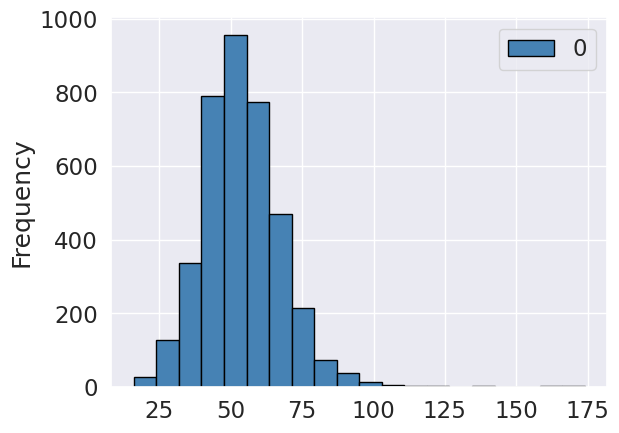

In [33]:
pd.DataFrame(res).plot(kind="hist",bins=20,color="steelblue",edgecolor="black",label="直方图")
